# Proyecto I

El objetivo en este problema de regresión es construir un modelo para predecir el precio de una casa en boston. Los datos se pueden cargar de los dataset que se encuentran en la libreria scikit-learn de python. Para solucionar realice las siguientes tareas:

1. Cargen los datos *boston* de la librería scikit learn.
2. Piensen como deberia ser el problema de regresión, formule el problema y aplique una regresion lineal multivariable normal, y una regularizada.
3. Modifique la matriz de regresores para obtener una estimación no lineal del precio de las casas. ¿Es necesario hacer esto?
4. Implemente una regresión utilizando LASSO.

Como el objetivo es evaluar sus conocimientos deben responder las siguientes preguntas:

1. ¿Qué modificación le hizó a la matriz de regresores? ¿Porqué hizó esos cambios?
2. ¿Que diferencias encuentra entre la regresión regularizada y la no regularizada?, ¿Cuál es mejor en su opinió? ¿Porqué?
3. ¿Cómo son los resultados proporcionados por LASSO, comparados con los que obtuvo con la regresion regularizada?
4. ¿Qué mejoras le haría al algoritmo? ¿Es un modelo lineal suficiente para solucionar este problema?
5. ¿Qué puede concluir si observa lso valores de los parámetros $\theta$? ¿Es bueno analizar directamente estos valores?
6. ¿Qué puede concluir al final de este proyecto?, escriba su opinión frente a los metodos de regresión y como se aplicó en este proyecto.

Deben realizar su proyecto en grupos de 3 o 4 alumnos, y entregar un notebook de jupyter con el código documentado con el análisis de cada una de las partes, es decir una explicación de que hace en cada parte del código; además, deben incluir las respuestas a las preguntas realizadas. Al entregar el notebook, por favor use la convención Nombre1__Apellido1_Regresión_1_ML.

**Nota:** Si las respuestas no son claras, o si su procedimiento nos está justificado, no se tendrá en cuenta. No olviden sus referencias.

***

# Cargar datos de *Boston*

In [131]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from numpy.linalg import pinv

In [114]:
# load Boston data set
'''
    The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
    prices and the demand for clean air', J. Environ. Economics & Management,
    vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
    ...', Wiley, 1980.   N.B. Various transformations are used in the table on
    pages 244-261 of the latter.

    Variables in order:
    CRIM     per capita crime rate by town
    ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS    proportion of non-retail business acres per town
    CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    NOX      nitric oxides concentration (parts per 10 million)
    RM       average number of rooms per dwelling
    AGE      proportion of owner-occupied units built prior to 1940
    DIS      weighted distances to five Boston employment centres
    RAD      index of accessibility to radial highways
    TAX      full-value property-tax rate per $10,000
    PTRATIO  pupil-teacher ratio by town
    B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT    % lower status of the population
    MEDV     Median value of owner-occupied homes in $1000's
'''


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


df_data = pd.DataFrame(data)

list_new_col_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

for old_name in list(df_data.columns):
    idx = list(df_data.columns).index(old_name)
    df_data.rename(columns={old_name : list_new_col_names[idx]}, inplace=True)

df_target = pd.DataFrame(target).rename(columns={0:"MEDV"})


# Planteaminto del problema de regresión

Encontrando cantidad de datos nulos:

In [115]:
print("*"*10, "Cantidad de datos nulos en df_data", "*"*10, "\n", df_data.isnull().sum(), "\n", "*"*30, "\n")
print("*"*10, "Cantidad de datos nulos en df_target", "*"*10, "\n", df_target.isnull().sum(), "\n", "*"*30, "\n")


********** Cantidad de datos nulos en df_data ********** 
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64 
 ****************************** 

********** Cantidad de datos nulos en df_target ********** 
 MEDV    0
dtype: int64 
 ****************************** 



Como no hay datos nulos, no es necesario ajustar el conjunto de datos. Es decir, no es necesario borrar o hacer aproximaciones en registros nulos.

Encontrando la correlacion entre `target` y `data`

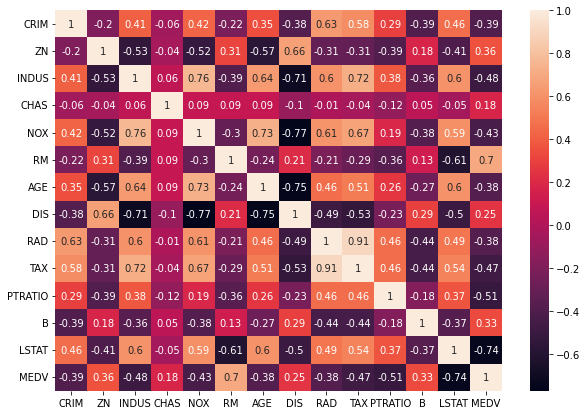

In [130]:
df_corr = pd.concat([df_data, df_target], axis=1).corr().round(2)

fig, ax = plt.subplots(figsize=(10,7))   
sn.heatmap(df_corr, annot=True)
plt.show()

Las variables que mayor correlacion tienen con `MEDV`, son `LSTAT` y `RM`.

## Regresión lineal simple

Para evidenciar la correlación entre las variables, se grafica un diagrama de dispersión.

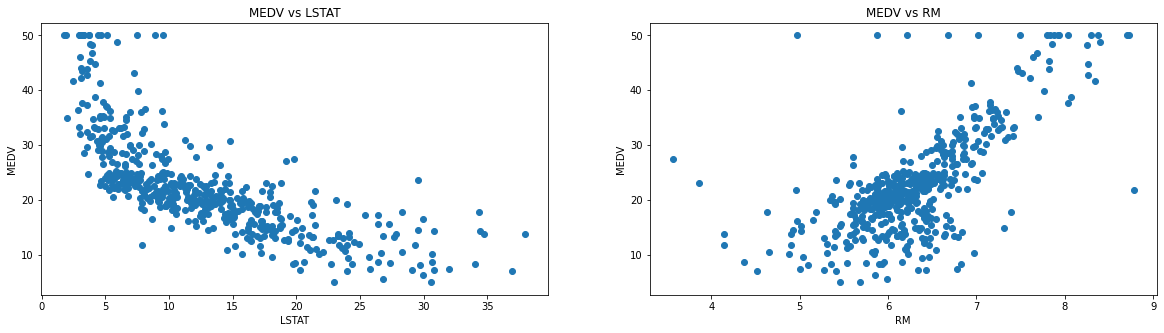

In [129]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df_data[col]
    y = df_target
    plt.scatter(x, y, marker='o')
    plt.title(f"MEDV vs {col}")
    plt.xlabel(col)
    plt.ylabel('MEDV')

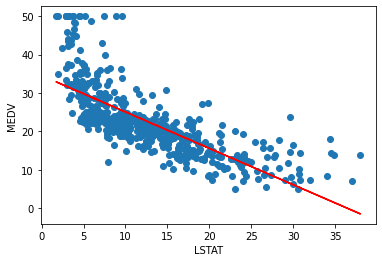

In [134]:
ones = np.ones((len(data),1))
x = df_data[['LSTAT']].values
y = df_target[['MEDV']].values
A = np.hstack((x,ones))

theta = ( pinv(A.T @ A) @ A.T ) @ y
h1 = A @ theta

# Graficando las variables de interes
plt.scatter(df_data['LSTAT'], df_target['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.plot(x,h1,'r')

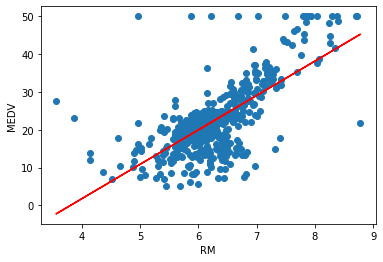

In [135]:
ones = np.ones((len(data),1))
x = df_data[['RM']].values
y = df_target[['MEDV']].values
A = np.hstack((x,ones))

theta = ( pinv(A.T @ A) @ A.T ) @ y
h2 = A @ theta

# Graficando las variables de interes
plt.scatter(df_data['RM'], df_target['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.plot(x,h2,'r')

## Regresión multivariable normal

In [139]:
ones = np.ones((len(data),1))
x = df_data.values
y = df_target.values
A = np.hstack((x,ones))

theta = ( pinv(A.T @ A) @ A.T ) @ y
h1 = A @ theta

e_1 = (h1-y).T @ (h1-y)/len(x)
print("Error Cuadratico Medio del modelo lineal :",e_1)


Error Cuadratico Medio del modelo lineal : [[21.89483118]]


### Modificando la matriz de regresores

Modelo de orden 2:

In [142]:
ones = np.ones((len(x),1))
x = df_data.values
y = df_target.values
A = np.column_stack((x**2,x,ones))
theta_2 =( pinv(A.T @ A) @ A.T ) @ y
h2 = A @ theta_2

e_2 = (h2-y).T @ (h2-y)/len(x)
print("Error Cuadratico Medio del modelo lineal :",e_2)

Error Cuadratico Medio del modelo lineal : [[14.44572524]]


Modelo de orden 3:

In [144]:
ones = np.ones((len(x),1))
x = df_data.values
y = df_target.values
A = np.column_stack((x**3, x**2, x,ones))
theta_3 =( pinv(A.T @ A) @ A.T ) @ y
h3 = A @ theta_3

e_3 = (h3-y).T @ (h3-y)/len(x)
print("Error Cuadratico Medio del modelo lineal :",e_3)

Error Cuadratico Medio del modelo lineal : [[19.95321282]]


Modelo de orden 4

In [146]:
ones = np.ones((len(x),1))
x = df_data.values
y = df_target.values
A = np.column_stack((x**4, x**3, x**2, x,ones))
theta_4 =( pinv(A.T @ A) @ A.T ) @ y
h4 = A @ theta_4

e_4 = (h4-y).T @ (h4-y)/len(x)
print("Error Cuadratico Medio del modelo lineal :",e_4)

Error Cuadratico Medio del modelo lineal : [[52.76976999]]


EL mejor modelo, es el de orden 2. 